# Guided Capstone Step 3 Exploratory Data Analysis - Answer Key

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. In this exercise, you will learn to build data profiles and plots, including relationship plot and data correlation plot. Let's get started! 


  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='DarkBlue'> Start by loading the necessary packages as we did in steps 1 & 2 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [0]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import json
%matplotlib inline
import plotly.graph_objects as go 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**<font color='DarkBlue'> If you need to change your path refer back to the notebook on steps 1 & 2 on how to do that. Then load the csv file you created in step 2, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [0]:
file='https://raw.githubusercontent.com/AVJdataminer/COVID19_GC/master/%20data/step2_output.csv'
df=pd.read_csv(file)
df.head()

,confirmed,deaths,timestamp,province_state,long,country_region,timestamp.date,lat,recovered
0,29.0,0.0,1585483200,missing,28.2833,Zambia,2020-03-29,-15.4167,0.0
1,609.0,40.0,1585483200,missing,30.0000,Egypt,2020-03-29,26.0000,132.0
2,2139.0,7.0,1585483200,missing,-71.5430,Chile,2020-03-29,-35.6751,75.0
3,156.0,0.0,1585483200,Saskatchewan,-106.4509,Canada,2020-03-29,52.9399,0.0
4,2840.0,22.0,1585483200,Quebec,-73.5491,Canada,2020-03-29,52.9399,0.0


In [0]:
df['timestamp.date']

0        2020-03-29
1        2020-03-29
2        2020-03-29
3        2020-03-29
4        2020-03-29
            ...    
15820    2020-01-22
15821    2020-01-22
15822    2020-01-22
15823    2020-01-22
15824    2020-01-22
Name: timestamp.date, Length: 15825, dtype: object

# Build data profile tables and plots 

**<font color='DarkBlue'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
confirmed,15825.0,5.389826e+02,4.888479e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,1.408860e+05
deaths,15825.0,2.119368e+01,2.704851e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.077900e+04
timestamp,15825.0,1.582531e+09,1.669441e+06,1.579694e+09,1.581077e+09,1.582546e+09,1.583928e+09,1.585483e+09
long,15825.0,6.239586e+01,3.422764e+03,-7.515200e+04,-1.445240e+01,2.175870e+01,9.000000e+01,1.491240e+05
lat,15825.0,9.131888e+01,1.706728e+03,-2.816700e+04,7.540000e+00,2.497400e+01,4.160860e+01,4.819600e+04
recovered,15825.0,1.504047e+02,2.178329e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.257000e+04


In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=df['timestamp.date'],
                y=df['confirmed'],
                name="confirmed",
                line_color='red',
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=df['timestamp.date'],
                y=df['deaths'],
                name="deaths",
                line_color='dimgray',
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=df['timestamp.date'],
                y=df['recovered'],
                name="recovered",
                line_color='green',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2020-01-22','2020-03-29'],
                  title_text="COVID-19 positive test rates")
fig.show()

**<font color='DarkBlue'>province_state	levels</font>**

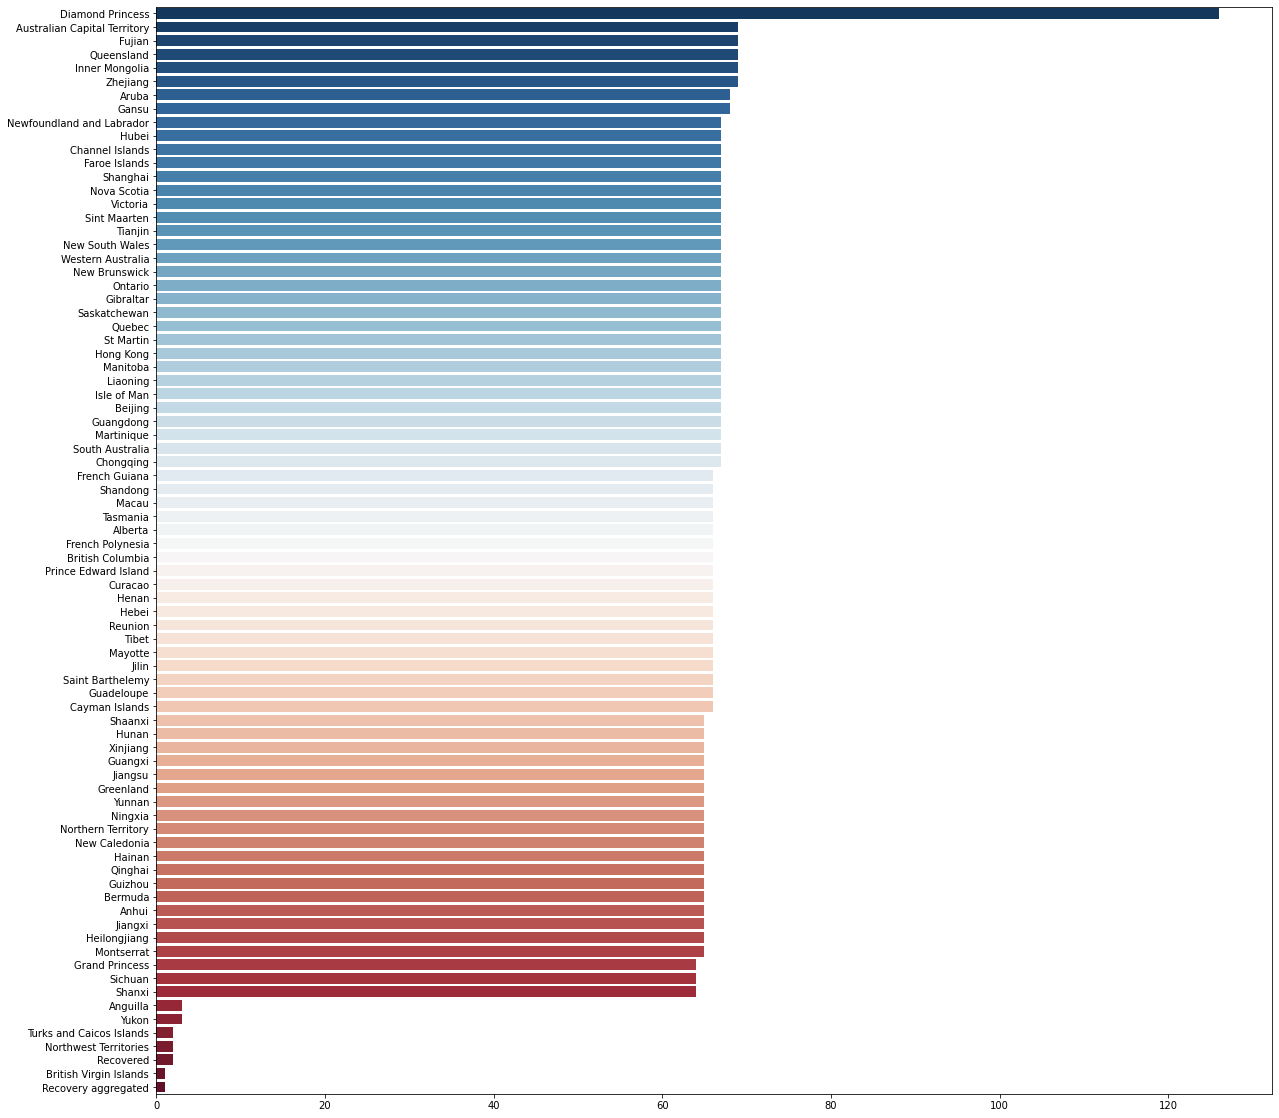

In [0]:
f, ax = plt.subplots(figsize=(20, 20))
x = pd.DataFrame(df.province_state.value_counts())
names = list(x.index)
values = list(x.province_state)
del names[0]
del values[0]
sns.barplot(x=values, y=names, palette="RdBu_r")

**<font color='DarkBlue'> country_region levels plot</font>**

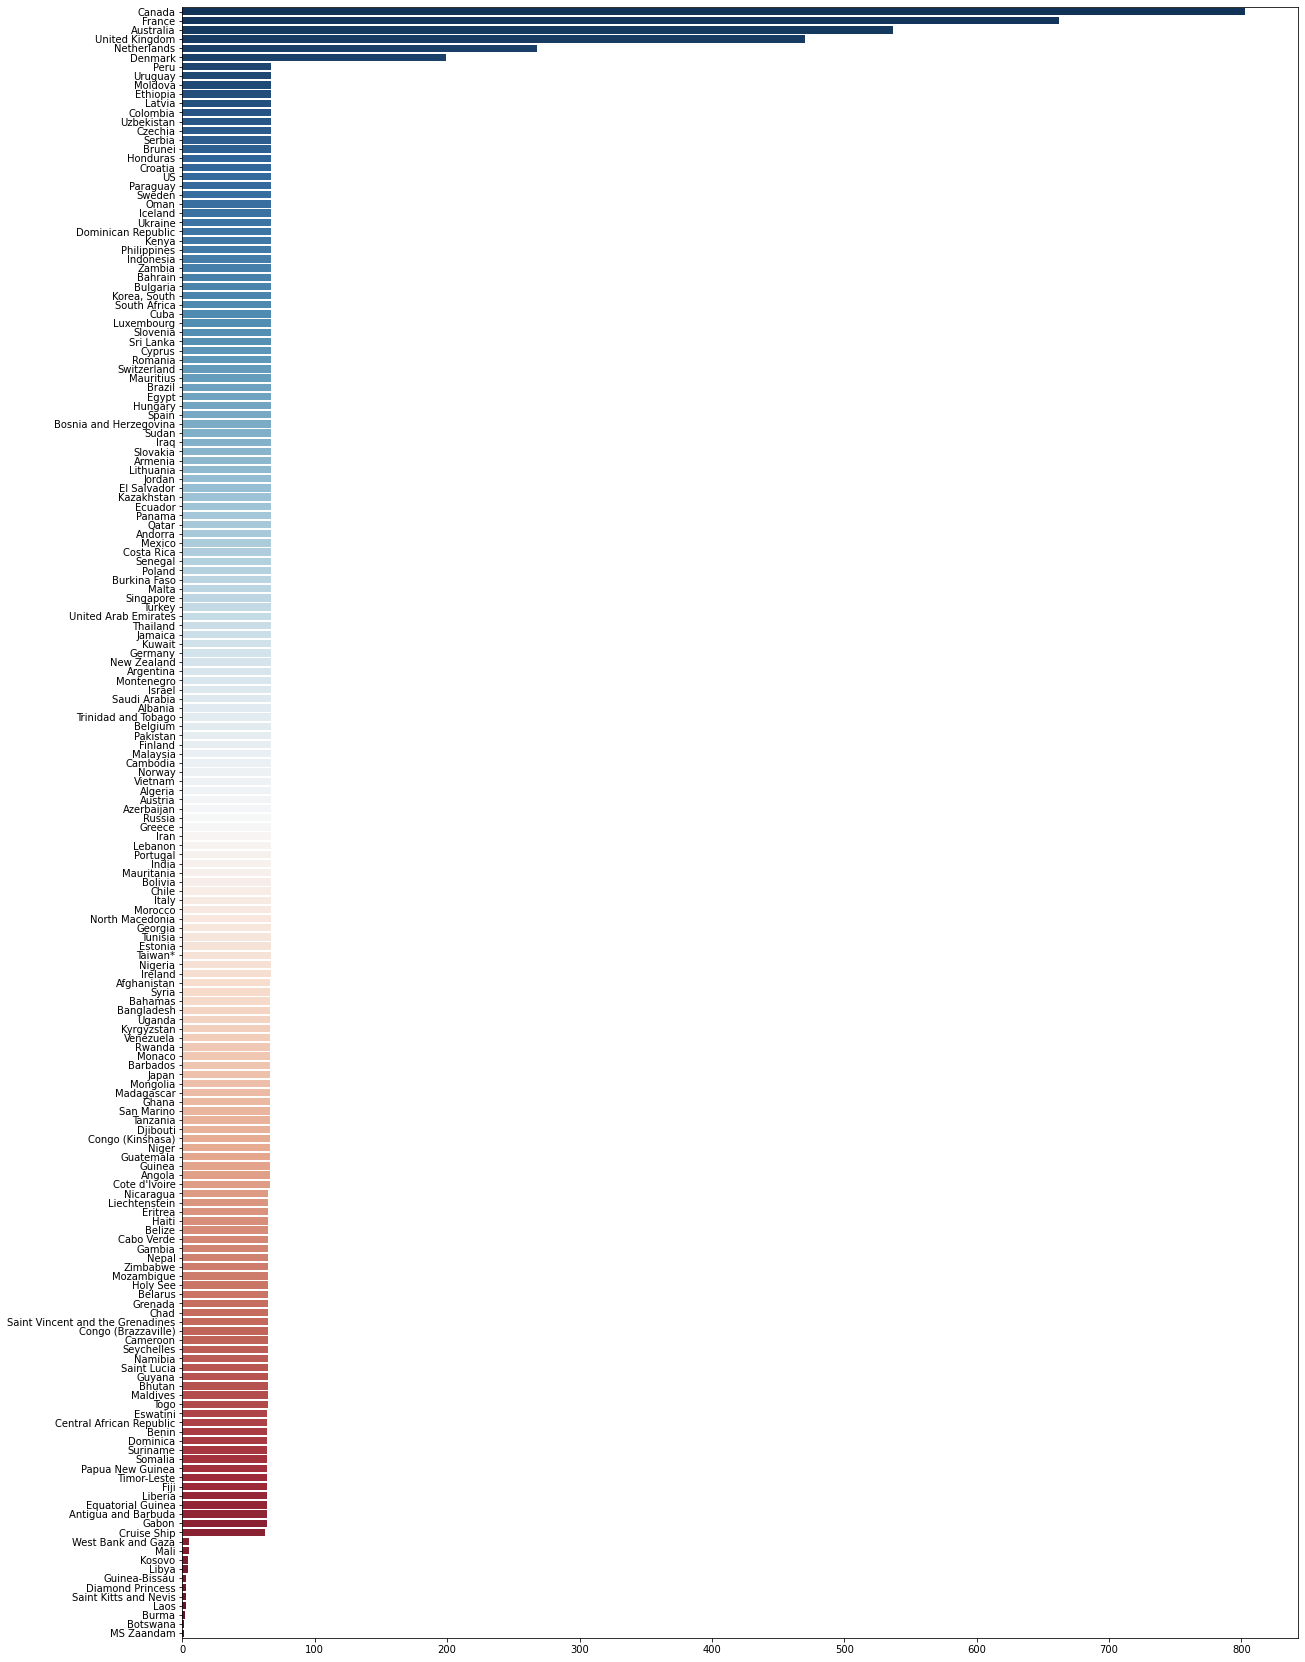

In [0]:
f, ax = plt.subplots(figsize=(20, 30))
x = pd.DataFrame(df.country_region.value_counts())
names = list(x.index)
values = list(x.country_region)
del names[0]
del values[0]
sns.barplot(x=values, y=names, palette="RdBu_r")

## Anamolies & Outliers - Review boxplots

**<font color='DarkBlue'> Print boxplot for every column</font>**

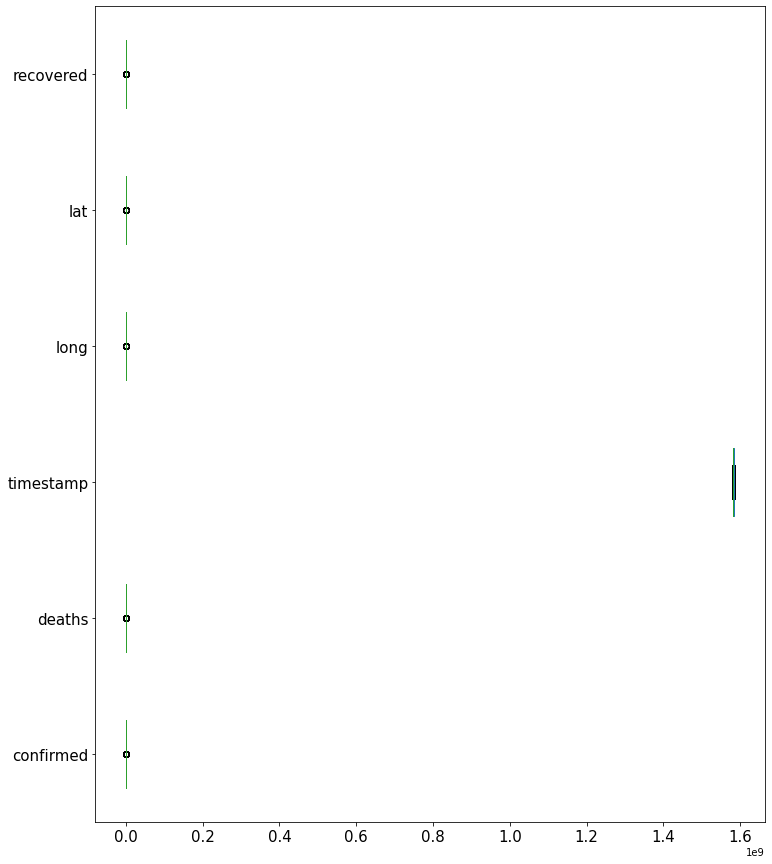

In [0]:
boxplot = df.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 
![](https://raw.github.com/AVJdataminer/COVID19_GC/master/Assets/AnnotatedBoxplot.png)

**<font color='DarkBlue'>**
Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed </font>

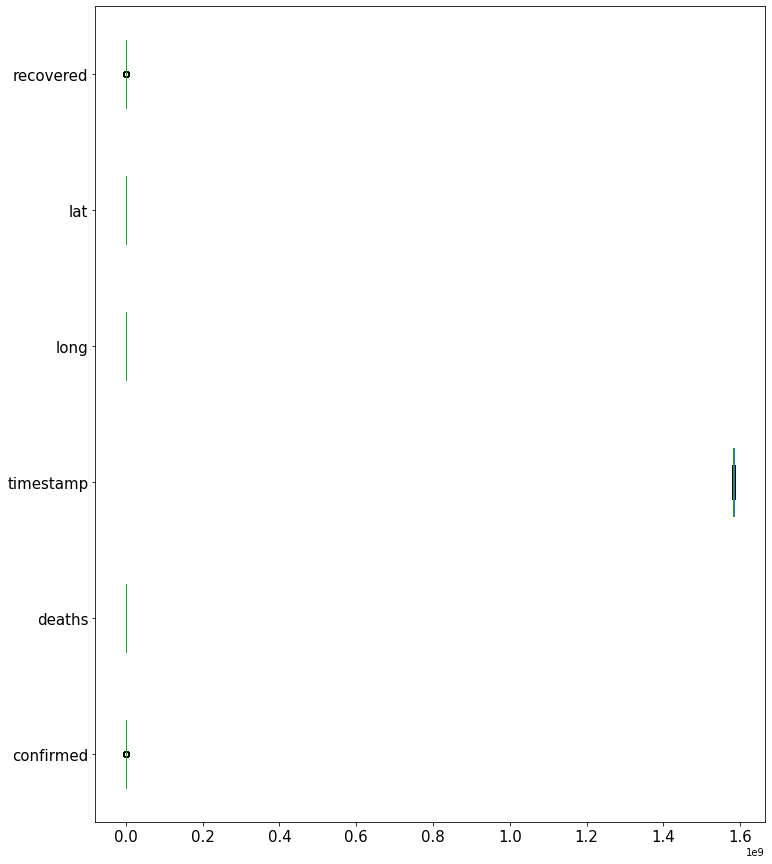

In [0]:
#Remove outliers based on IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

dfno = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
boxplot = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [0]:
print(df.shape)
df.shape

(15825, 9)


(15825, 9)


 **<font color='DarkBlue'> Create correlation heatmap for continuous features.</font>**

In [0]:
corr = df.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

,confirmed,deaths,timestamp,long,lat,recovered
confirmed,1.000000,0.860000,0.110000,0.000000,0.100000,0.700000
deaths,0.860000,1.000000,0.090000,-0.000000,0.030000,0.600000
timestamp,0.110000,0.090000,1.000000,0.020000,0.070000,0.060000
long,0.000000,-0.000000,0.020000,1.000000,0.060000,0.000000
lat,0.100000,0.030000,0.070000,0.060000,1.000000,0.000000
recovered,0.700000,0.600000,0.060000,0.000000,0.000000,1.000000


When reviewing the Pearson correlation coefficient heat map you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

 **<font color='DarkBlue'> Create any other figures you think would interesting to learn more about the data..</font>**

 **<font color='DarkBlue'> Save the updated dataset as step3_output in your data folder.</font>**

In [0]:
df.to_csv('data/step3_output.csv',index=False)